# Daten-Analyse Spaceship Titanic

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree


# Load CSV into Dataframe from Data folder
df = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [19]:
df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [20]:
def convert_col_to_numerical(df, col):
    unique_vals = df[col].unique()
    val_dict = {}
    count = 0
    for val in unique_vals:
        val_dict[val] = count
        count += 1
    df[col] = df[col].replace(val_dict)
    return df


df[['Deck', 'Room', 'Side']] = df['Cabin'].str.split('/', expand=True)




df = convert_col_to_numerical(df, "HomePlanet") #
df = convert_col_to_numerical(df, "CryoSleep") # 0 = No, 1 = Yes
df = convert_col_to_numerical(df, "Deck") # 0 = A, 1 = B, 2 = C, 3 = D, 4 = E, 5 = F, 6 = G, 7 = T
df = convert_col_to_numerical(df, "Side") # 0 = left, 1 = right
df = convert_col_to_numerical(df, "VIP") # 0 = No, 1 = Yes
df = convert_col_to_numerical(df, "Destination") # 0 = left, 1 = right

df["Deck"] = df["Deck"].astype(np.float64)


df['Age'].fillna(df['Age'].mean(), inplace=True)
df["FoodCourt"].fillna(df["FoodCourt"].mean(), inplace=True)
df["Spa"].fillna(df["Spa"].mean(), inplace=True)
df["VRDeck"].fillna(df["VRDeck"].mean(), inplace=True)
df["ShoppingMall"].fillna(df["ShoppingMall"].mean(), inplace=True)
# fill Roomservice nan
df["RoomService"].fillna(0, inplace=True)
df_test["RoomService"].fillna(0, inplace=True)


df['Expenses'] = df['FoodCourt'] + df['Spa'] + df['VRDeck'] + df['ShoppingMall']

PID = df['PassengerId']
df.drop(['PassengerId', 'Name', 'Cabin',"Room"], axis=1, inplace=True)

######################################################### "FoodCourt", "Spa", "VRDeck", "ShoppingMall"

df_test[['Deck', 'Room', 'Side']] = df_test['Cabin'].str.split('/', expand=True)


df_test = convert_col_to_numerical(df_test, "HomePlanet") #
df_test = convert_col_to_numerical(df_test, "CryoSleep") # 0 = No, 1 = Yes
df_test = convert_col_to_numerical(df_test, "Deck") # 0 = A, 1 = B, 2 = C, 3 = D, 4 = E, 5 = F, 6 = G, 7 = T
df_test = convert_col_to_numerical(df_test, "Side") # 0 = left, 1 = right
df_test = convert_col_to_numerical(df_test, "VIP") # 0 = No, 1 = Yes
df_test = convert_col_to_numerical(df_test, "Destination") # 0 = left, 1 = right


df_test["Deck"] = df_test["Deck"].astype(np.float64)


df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)
df_test["FoodCourt"].fillna(df_test["FoodCourt"].mean(), inplace=True)
df_test["Spa"].fillna(df_test["Spa"].mean(), inplace=True)
df_test["VRDeck"].fillna(df_test["VRDeck"].mean(), inplace=True)
df_test["ShoppingMall"].fillna(df_test["ShoppingMall"].mean(), inplace=True)


df_test['Expenses'] = df_test['FoodCourt'] + df_test['Spa'] + df_test['VRDeck'] + df_test['ShoppingMall']


PID = df_test['PassengerId']
df_test.drop(['PassengerId', 'Name', 'Cabin', "Room"], axis=1, inplace=True)

In [21]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,Expenses
0,0.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0
1,1.0,0.0,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,True,1.0,1.0,627.0
2,0.0,0.0,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,False,2.0,1.0,10340.0
3,0.0,0.0,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,False,2.0,1.0,5176.0
4,1.0,0.0,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,True,1.0,1.0,788.0


<Axes: >

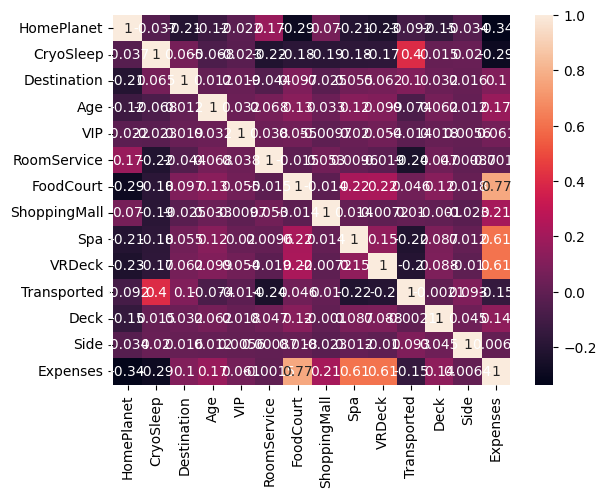

In [22]:
sns.heatmap(df.corr(), annot=True)

In [23]:
print(df.shape)
df.loc[df["Age"]<=18].value_counts()

#Print df Info
df.info()


(8693, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   float64
 1   CryoSleep     8693 non-null   float64
 2   Destination   8693 non-null   float64
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   float64
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Deck          8693 non-null   float64
 12  Side          8693 non-null   float64
 13  Expenses      8693 non-null   float64
dtypes: bool(1), float64(13)
memory usage: 891.5 KB


In [24]:
X = df.drop(['Transported'], axis=1)
y  = df['Transported']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# import accuracy_score
from sklearn.metrics import accuracy_score

clf = AdaBoostClassifier(n_estimators=500, random_state=42)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(accuracy_score(y_test, clf.predict(X_test)))

KNN = KNeighborsClassifier(n_neighbors=15)
KNN.fit(X_train, y_train)
print(KNN.score(X_test, y_test))
print(accuracy_score(y_test, KNN.predict(X_test)))

DT = DecisionTreeClassifier(max_leaf_nodes=20,random_state=42)
DT.fit(X_train, y_train)
print(DT.score(X_test, y_test))
print(accuracy_score(y_test, DT.predict(X_test)))

RF = RandomForestClassifier(n_estimators=500, max_leaf_nodes=100, random_state=42)
RF.fit(X_train, y_train)
print(RF.score(X_test, y_test))
print(accuracy_score(y_test, RF.predict(X_test)))   

0.7814836112708453
0.7814836112708453
0.7722829212190915
0.7722829212190915
0.7780333525014376
0.7780333525014376
0.7889591719378953
0.7889591719378953


In [26]:
# Use AdaBoost on the test.csv
Transported = RF.predict(df_test)


# Create Dataframe with ids and survived
output = pd.DataFrame({'PassengerId': pd.read_csv("data/test.csv")["PassengerId"], 'Transported': Transported})
output.head(30)

# output to csv
output.to_csv('submission2.csv', index=False)

In [27]:
output.head(30)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
5,0027_01,True
6,0029_01,True
7,0032_01,False
8,0032_02,False
9,0033_01,True
